<a href="https://colab.research.google.com/github/eoinleen/biochem-general/blob/main/AKTA_SEC_xlsx.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

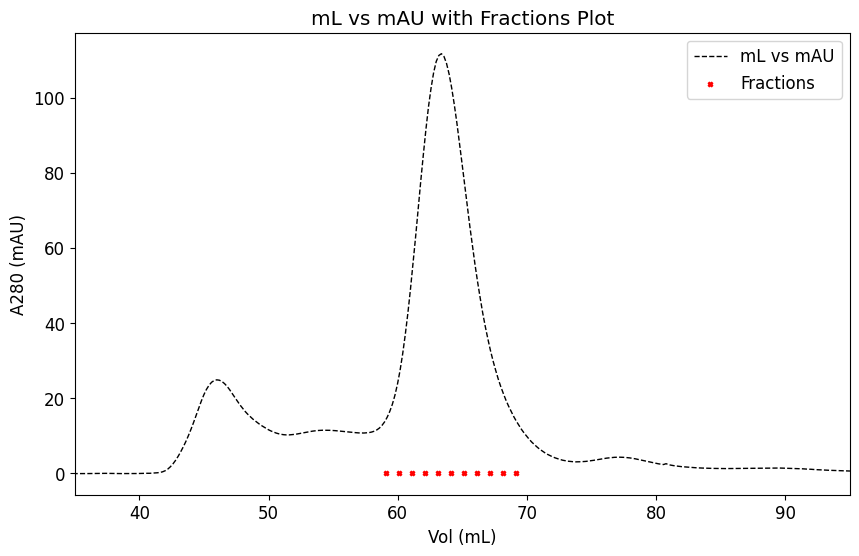

In [19]:
"""OK this is code that Windows Co-pilot wrote with my iteractive instructions.
It takes the raw data from an AKTA SEC run in xlsx format and plots it.
You need to upload the sheet to your drive and change the file path"""

import pandas as pd
import matplotlib.pyplot as plt

# Use your specified file path
file_path = '/content/drive/MyDrive/SEC-data/20241206.xlsx'
df = pd.read_excel(file_path, header=1)  # Assuming your data starts at the second row
df.columns = ['ml1', 'mAu', 'ml2', 'mS/cm', 'ml3', '%B', 'ml4', 'Fractions', 'Inject1', 'Inject2', 'Logbook1', 'Logbook2']

# Convert columns to numeric types if necessary
df['ml1'] = pd.to_numeric(df['ml1'], errors='coerce')
df['mAu'] = pd.to_numeric(df['mAu'], errors='coerce')
df['ml4'] = pd.to_numeric(df['ml4'], errors='coerce')

# Define fraction range variables
fraction_start = 59.12
fraction_end = 69.12

# Filter the DataFrame to include only the specified range for ml4
filtered_df = df[(df['ml4'] >= fraction_start) & (df['ml4'] <= fraction_end)]

# Set font properties
font = {'family': 'DejaVu Sans', 'size': 12}
plt.rc('font', **font)

# Plot mL versus mAU with black dashed line and no data points
plt.figure(figsize=(10, 6))
plt.plot(df['ml1'], df['mAu'], linestyle='--', linewidth=1, color='black', label='mL vs mAU')

# Plot filtered fractions as red 'X' markers at y=0 with finer size
plt.scatter(filtered_df['ml4'], [0]*len(filtered_df), marker='X', color='red', s=10, label='Fractions', zorder=3)

# Set the x-axis limits to show only the specified range
plt.xlim(35, 95)  # You can adjust these values as needed

# Set the background to transparent
plt.gca().patch.set_alpha(0.0)
plt.gcf().patch.set_alpha(0.0)

# Remove grid lines
plt.grid(False)

# Update axis labels
plt.title('mL vs mAU with Fractions Plot')
plt.xlabel('Vol (mL)')
plt.ylabel('A280 (mAU)')
plt.legend()
plt.show()
